# Linear Regression Training Walkthrough

In [15]:
%pip install --upgrade numpy pandas matplotlib scikit-learn seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


## 1. Imports & random seed

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from IPython.display import display, Markdown
np.random.seed(42)

## 2. Generate synthetic housing data

In [5]:
n = 50
X = np.random.uniform(1_000, 3_000, n)
true_w, true_b = 200, 100_000
noise = np.random.normal(0, 30_000, n)
y = true_w * X + true_b + noise
df = pd.DataFrame({'size_sqft': X, 'price_$': y})
df.head()

,size_sqft,price_$
0,1749.080238,471970.044939
1,2901.428613,685426.771000
2,2463.987884,589328.128253
3,2197.316968,530430.282811
4,1312.037281,318051.796466


## 3. Visualise raw data

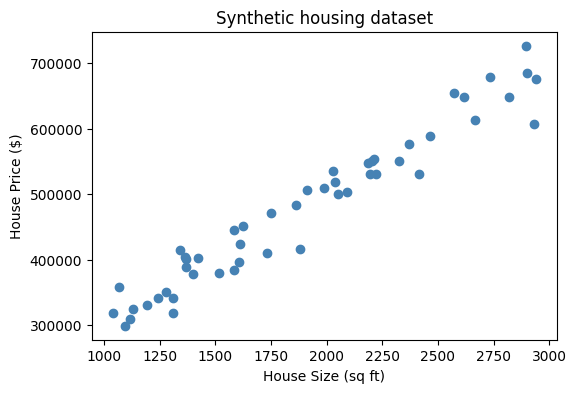

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(df['size_sqft'], df['price_$'], c='steelblue')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title('Synthetic housing dataset')
plt.show()

## 4. Analytical solution (Normal Equation)

In [7]:
X_design = np.vstack([df['size_sqft'], np.ones(n)]).T
theta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
w_hat, b_hat = theta
display(Markdown(f"**Estimated parameters**  \n$w = {w_hat:,.1f}$  \n$b = {b_hat:,.0f}$"))

**Estimated parameters**  
$w = 196.6$  
$b = 106,252$

## 5. Plot fitted line and residuals

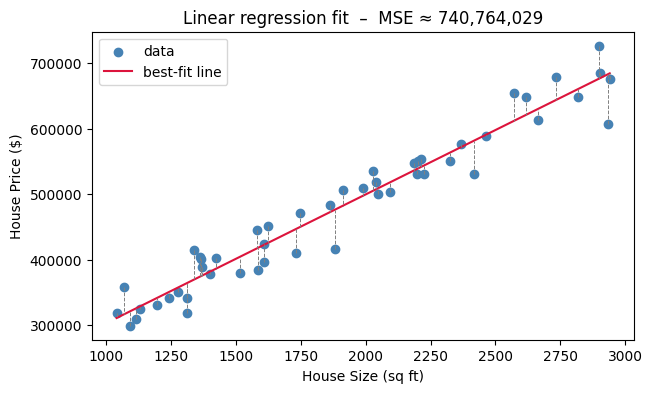

In [8]:
y_pred = w_hat * df['size_sqft'] + b_hat
mse = mean_squared_error(y, y_pred)
plt.figure(figsize=(7,4))
plt.scatter(df['size_sqft'], y, label='data', color='steelblue')
x_sorted = np.sort(df['size_sqft'])
plt.plot(x_sorted, w_hat*x_sorted + b_hat, color='crimson', label='best-fit line')
for xi, yi, ypi in zip(df['size_sqft'], y, y_pred):
    plt.plot([xi, xi], [yi, ypi], linestyle='--', linewidth=0.7, color='grey')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title(f'Linear regression fit  –  MSE ≈ {mse:,.0f}')
plt.legend()
plt.show()

## 6. Gradient-descent training

In [ ]:
lr = 1e-8 # learning rate
epochs = 2000
w_gd, b_gd = 0.0, 0.0
loss_history = []
for epoch in range(epochs):
    y_hat = w_gd * X + b_gd
    grad_w = (-2/n) * np.sum((y - y_hat) * X)
    grad_b = (-2/n) * np.sum(y - y_hat)
    w_gd -= lr * grad_w
    b_gd -= lr * grad_b
    loss_history.append(mean_squared_error(y, y_hat))
display(Markdown(f"**After {epochs} epochs:**  \n$w = {w_gd:,.1f}$  \n$b = {b_gd:,.0f}$  \nMSE = {loss_history[-1]:,.0f}$"))

**After 2000 epochs:**  
$w = 248.1$  
$b = 0$  
MSE = 1,686,228,397$

#### Learning Rate

| What is it?                                                                                               | Why it matters                                                                                                                                                                   | How it shows up in our two solutions                                                                                                                                                                                                                                                                           |
| --------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| A small positive scalar that scales the gradient update. <br>`w ← w − lr · ∂L/∂w`<br>`b ← b − lr · ∂L/∂b` | *Controls the step size* while descending the loss landscape.<br><br>▪ **Too small →** many epochs, slow convergence.<br>▪ **Too large →** can overshoot, diverge, or oscillate. | • Affects **only** the *Gradient Descent* line because the Normal-Equation route does **no** iterative stepping—it jumps straight to the optimum (so it has no `lr`).<br>• With our choice `lr = 1 × 10⁻⁸`, 2 000 epochs get `w_gd, b_gd` close enough that the green dashed line almost overlaps the red one. |


#### Variables

| Variable | How it is obtained                                                 | Numerical meaning                                               | Used for…                                                                    |
| -------- | ------------------------------------------------------------------ | --------------------------------------------------------------- | ---------------------------------------------------------------------------- |
| `w_hat`  | Closed-form slope from the **Normal Equation**:<br>`(Xᵀ X)⁻¹ Xᵀ y` | Increase in predicted **price** for each extra square foot.     | The red *“Normal Eq. solution”* line and any predictions you make with it.   |
| `b_hat`  | Closed-form intercept (same solve)                                 | Baseline price when size = 0 sq ft (pure extrapolation anchor). | Same as above.                                                               |
| `w_gd`   | Slope found after 2 000 **gradient-descent** updates with `lr`.    | Approximates `w_hat`; tiny mismatch depends on `lr`, epochs.    | The green *“Gradient Descent”* line and predictions made with GD parameters. |
| `b_gd`   | Intercept from gradient-descent training                           | Approximates `b_hat`.                                           | Same as above.                                                               |


## 7. Loss curve

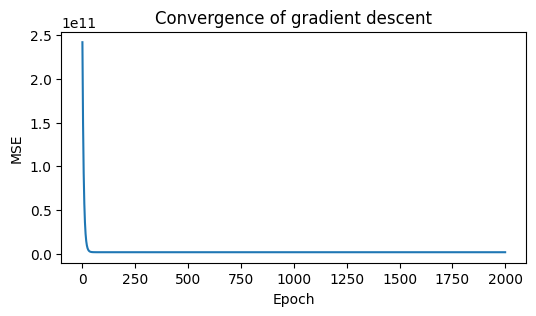

In [10]:
plt.figure(figsize=(6,3))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Convergence of gradient descent')
plt.show()

## 8. Compare analytical vs. gradient-descent lines

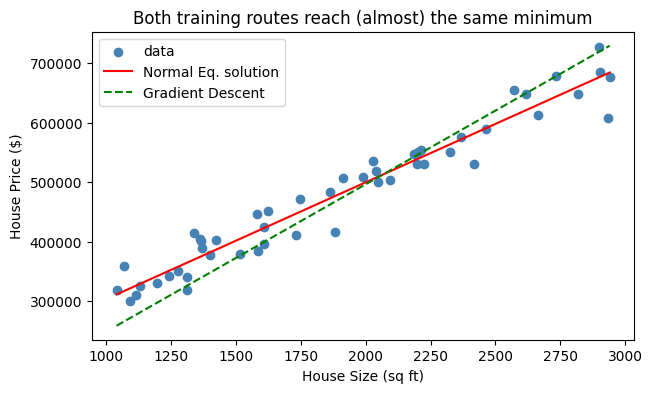

In [11]:
plt.figure(figsize=(7,4))
plt.scatter(df['size_sqft'], y, c='steelblue', label='data')
plt.plot(x_sorted, w_hat*x_sorted + b_hat, 'r-', label='Normal Eq. solution')
plt.plot(x_sorted, w_gd*x_sorted + b_gd, 'g--', label='Gradient Descent')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.legend()
plt.title('Both training routes reach (almost) the same minimum')
plt.show()

## 9. Predict new house price

In [ ]:
# Using the original model to make predictions
new_sqft = 1500
pred_price = w_hat * new_sqft + b_hat
display(Markdown(f'**Predicted price for a 1 500 sq ft house:**  \\n${pred_price:,.0f}'))

**Predicted price for a 1 500 sq ft house:**  \n$401,225

In [ ]:
# Predicting the price of a new house
# Using the gradient descent model   
new_sqft = 1500
pred_price = w_gd * new_sqft + b_gd
display(Markdown(f'**Predicted price for a 1 500 sq ft house:**  \\n${pred_price:,.0f}'))

**Predicted price for a 1 500 sq ft house:**  \n$372,162

## 10. Mathematical recap
> The optimisation satisfies  
> $ \mathcal{L}(w,b)= \frac{1}{n}\sum_{i=1}^n (y_i-(w x_i+b))^2 $  
> and the closed-form minimiser is  
> $ \theta^* = (X^\top X)^{-1}X^\top y $.  
> Gradient descent iteratively approaches the same minimum.

## 10. Best-practice model-evaluation steps for our housing-price example.

In [16]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Reuse the same synthetic data: 50 houses, size between 1 000-3 000 sq ft, price ≈ $100 000 + 200 · size + noise.
- Adjust matrix sizes to prepare them for assessment

In [19]:
np.random.seed(42)
n = 50
X = np.random.uniform(1_000, 3_000, n).reshape(-1, 1)   # feature matrix (n,1)
true_w, true_b = 200, 100_000
noise = np.random.normal(0, 30_000, n).reshape(-1, 1)
y = true_w * X + true_b + noise                         # target vector (n,1)

df = pd.DataFrame({'size_sqft': X.ravel(), 'price_$': y.ravel()})
df.head()


,size_sqft,price_$
0,1749.080238,471970.044939
1,2901.428613,685426.771000
2,2463.987884,589328.128253
3,2197.316968,530430.282811
4,1312.037281,318051.796466


### Hold-out train / test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


#### Fit on the training set, then compute four standard metrics on the test set:

- MAE – Mean Absolute Error
- MSE – Mean Squared Error
- RMSE – √MSE (same units as target)
- $R^2$ – Coefficient of determination

When you use sklearn.linear_model.LinearRegression and call linreg.fit(X_train, y_train), it does not perform training with a predefined number of epochs in the same way that iterative optimization algorithms (like gradient descent) do.

Here's why and what LinearRegression does instead:

Closed-Form Solution: LinearRegression in scikit-learn typically solves for the optimal w (coefficients) and b (intercept) directly using a closed-form solution. This solution is derived from the normal equations (a set of linear equations that directly give the values of the parameters that minimize the sum of squared residuals).

Non-Iterative: Because it uses a direct mathematical solution, there's no iterative process of "epochs" where the model repeatedly updates its parameters over multiple passes through the training data. The calculation is done in one go.

No Epochs to Track: Since there are no epochs, there's no way to "know" the number of epochs because the concept doesn't apply to this specific implementation.

In [21]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_test = linreg.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred_test)
mse  = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred_test)

print(f"MAE : {mae:,.0f}")
print(f"MSE : {mse:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R^2 : {r2:.3f}")


MAE : 20,515
MSE : 716,674,196
RMSE: 26,771
R^2 : 0.918


#### Ideal residuals are roughly symmetric around 0 and have no clear pattern.

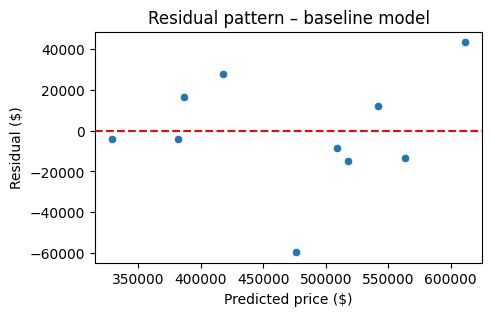

In [22]:
residuals = y_test - y_pred_test
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_pred_test.ravel(), y=residuals.ravel())
plt.axhline(0, color='red', ls='--')
plt.xlabel("Predicted price ($)")
plt.ylabel("Residual ($)")
plt.title("Residual pattern – baseline model")
plt.show()


#### If you want to train and apply the number of epochs hyper-parameter

- Use iterative optimization algorithms: Such as Gradient Descent, Stochastic Gradient Descent (SGD), or Mini-batch Gradient Descent. 
- These algorithms start with initial parameter values and then iteratively adjust them in the direction that minimizes the loss function. Each pass over the entire training dataset is considered an epoch.
- Neural Networks: Almost all neural network training relies on iterative optimization, and epochs are a fundamental concept there.
- sklearn.linear_model.SGDRegressor: If you specifically wanted to train a linear regression model using an iterative approach like Stochastic Gradient Descent in scikit-learn, you would use SGDRegressor. This model does have parameters like max_iter (which corresponds to the number of epochs) and early_stopping.

#### Generate new data

In [23]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
np.random.seed(42)

n        = 1_000                       # bigger set to see SGD’s benefit
X        = np.random.uniform(1_000, 3_000, n).reshape(-1, 1)
true_w   = 200
true_b   = 100_000
noise    = np.random.normal(0, 30_000, n).reshape(-1, 1)
y        = true_w * X + true_b + noise
X_train, X_test, y_train, y_test = train_test_split(
    X, y.ravel(), test_size=0.2, random_state=42)


#### SGDRegressor: anatomy of the key hyper-parameters

| Parameter                | Meaning                                                                                                      | Default             | Typical tuning notes                                             |
| ------------------------ | ------------------------------------------------------------------------------------------------------------ | ------------------- | ---------------------------------------------------------------- |
| `max_iter`               | Hard cap on *epochs* (full passes over the data).                                                            | `1 000`             | Increase until validation loss no longer improves significantly. |
| `learning_rate` / `eta0` | Step-size schedule / initial rate.                                                                           | `invscaling / 0.01` | `constant` or `optimal` often work; tune `eta0`.                 |
| `tol`                    | Minimum change in validation loss to declare convergence.                                                    | `1e-3`              | Lower values → more epochs before stopping.                      |
| `early_stopping`         | If `True`, split off a validation subset; stop when val-loss fails to improve for `n_iter_no_change` epochs. | `False`             | Good practice for automatic epoch selection.                     |
| `validation_fraction`    | Fraction of training set used when `early_stopping=True`.                                                    | `0.1`               | Leave default unless data are tiny.                              |


#### Train with SGDRegressor and fixed epoch count

We start with max_iter=5 to show deliberate under-training, then crank it up.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

def train_sgd(max_iter, **kwargs):
    sgd = SGDRegressor(loss="squared_error",
                       penalty=None,      # pure least-squares
                       learning_rate="invscaling",
                       eta0=0.01,
                       max_iter=max_iter,
                       random_state=42,
                       **kwargs)
    sgd.fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    rmse   = mean_squared_error(y_test, y_pred, squared=False)
    return sgd.coef_[0], sgd.intercept_[0], rmse

for m in [5, 50, 500, 5_000]:
    w, b, rmse = train_sgd(m)
    print(f"max_iter={m:>5}  |  w={w:7.1f}  b={b:8.0f}  |  RMSE={rmse:,.0f}")


c:\StudentWork\Code\CSCN8010\CSCN8010_LinearRegression\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


TypeError: got an unexpected keyword argument 'root_mean_squared_error'

#### Enable early stopping to auto-decide epochs

early_stopping=True + validation_fraction=0.1 + lower tol → the model keeps going until the validation score hasn’t improved by ≥ tol for n_iter_no_change epochs (default 5).

In [ ]:
sgd_es = SGDRegressor(loss="squared_error",
                      learning_rate="invscaling",
                      eta0=0.01,
                      penalty=None,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change=5,
                      tol=1e-4,
                      max_iter=10_000,          # hard cap (unlikely to hit)
                      random_state=42)
sgd_es.fit(X_train, y_train)
y_pred_es = sgd_es.predict(X_test)
rmse_es   = mean_squared_error(y_test, y_pred_es, squared=False)

print("Early-stopped after   :", sgd_es.n_iter_, "epochs")
print(f"w={sgd_es.coef_[0]:.1f}  b={sgd_es.intercept_[0]:,.0f}  |  RMSE={rmse_es:,.0f}")


#### Visualise RMSE vs. epochs

Plot the test-set RMSE for a sweep of epoch counts to see diminishing returns.

In [ ]:
epoch_list, rmse_list = [], []
for m in range(1, 801, 20):          # 1 to 800 in steps of 20
    _, _, rmse_m = train_sgd(m)
    epoch_list.append(m)
    rmse_list.append(rmse_m)

plt.figure(figsize=(6,3))
plt.plot(epoch_list, rmse_list, marker='o')
plt.axhline(rmse_base, color='red', ls='--', label='Closed-form RMSE')
plt.axhline(rmse_es , color='green', ls='--', label='Early-stopped RMSE')
plt.xlabel("Epochs (max_iter)")
plt.ylabel("Test RMSE ($)")
plt.title("Effect of epoch count on SGD performance")
plt.legend()
plt.show()
